# Python for Data Science
## Session 5 
### Basic Libraries II

---

## Outline

1. Json, pickle and parquet formats

2. Re library

3. Time and Datetime libraries

---

## Basic Libraries II

Before starting working with different formats, let's see how we can create and read text files using Python buil-in function called **open**. 

In [4]:
# Open and write down a file
f = open('text_file.txt', 'w')
f.write('Hello')
f.write('\n')
f.write('Bye')
f.close()

In [5]:
# Open and read content of a file
f = open('text_file.txt', 'r')
content = f.read()
f.close()
print(content)

Hello
Bye


In [6]:
# We can also simply split lines by using
f = open('text_file.txt', 'r')
lines = f.read().splitlines()
f.close()
# loop over the lines
for idx, line in enumerate(lines): # enumerate provides returns the index and element
    print(f'Line {idx}: {line}')

Line 0: Hello
Line 1: Bye


In [7]:
# Let's create a CSV (comma separated values) file
header = "Name,Age,Grade\n"
rows = [
    "Jaume,30,8.9\n",
    "Francisco,25,7.1\n",
    "Elena,35,9.2\n"
]

In [8]:
with open("grades.csv", "w") as f:
    f.write(header) # Write the header
    
    # Write each row of data
    for row in rows:
        f.write(row)

In [9]:
with open("grades.csv", "r") as f:
    lines = f.read().splitlines()
    
header = lines.pop(0)
header = header.split(',')

print(header)

grades = {'students': []}
# create dictionary
for line in lines:
    student_dict = {}
    values = line.split(',')
    for idx, column in enumerate(header):
        student_dict[column] = values[idx]
    grades['students'].append(student_dict)
    
grades

['Name', 'Age', 'Grade']


{'students': [{'Name': 'Jaume', 'Age': '30', 'Grade': '8.9'},
  {'Name': 'Francisco', 'Age': '25', 'Grade': '7.1'},
  {'Name': 'Elena', 'Age': '35', 'Grade': '9.2'}]}

## Basic Libraries II

Another useful statement is **with**. It helps handling properly the resources within its reach, by closing them after its execution. It also makes the code more readable and maintainable.

In [10]:
with open('text_file.txt', 'r') as f: # we don't have to close the open file, f.close()
    lines = f.read().splitlines()
    
print(lines)

['Hello', 'Bye']


## Basic Libraries II

JavaScript Object Notation (JSON) is a text-based format used for data storing and data interchange across different platforms and languages.

Same as dictionaries, data is represented as key-value pairs. 

## Basic Libraries II

JavaScript Object Notation (JSON) is a text-based format used for data storing and data interchange across different platforms and languages.

Same as dictionaries, data is represented as key-value pairs. 

In [11]:
{
    "students": [
        {
            "name": "Amelie",
            "age": 35
        },
        {
            "name": "Edgar",
            "age": 32
        }
    ]
}

{'students': [{'name': 'Amelie', 'age': 35}, {'name': 'Edgar', 'age': 32}]}

In [12]:
# other valid formats
[
    {
        "name": "Amelie",
        "age": 35
    },
    {
        "name": "Edgar",
        "age": 32
    }
]

[{'name': 'Amelie', 'age': 35}, {'name': 'Edgar', 'age': 32}]

In [13]:
# other valid formats
[
    "Amelie",
    137,
    True, # within the json file True is equivalent to true
    None, # within the json file None is equivalent to null
    {"age": 35},
    [10, 12, 13]
]

['Amelie', 137, True, None, {'age': 35}, [10, 12, 13]]

## Basic Libraries II

To read and write down json files and manipulate them, we have the built-in json library within Python.

In [14]:
import json
data = {
    "students": [
        {
            "name": "Amelie",
            "age": 35,
            "scolarship": True
        },
        {
            "name": "Edgar",
            "age": 32,
            "scolarship": None
        }
    ]
}

with open('json_example.json', 'w') as f: # write down json
    json.dump(data, f)

In [15]:
with open('json_example.json', 'r') as f:
    json_data = json.load(f)
    
print(json_data)

{'students': [{'name': 'Amelie', 'age': 35, 'scolarship': True}, {'name': 'Edgar', 'age': 32, 'scolarship': None}]}


## Basic Libraries II

Similar to JSON, Python includes a Pickle library. However, in contrast to the JSON format, Pickle is a Python-specific serialization format. The Pickle library provides tools to serialize Python objects, which involves transforming them into a stream of bytes. It also allows you to read these byte streams by deserializing them, transforming them back into their original Python objects.

In contrast to the JSON format, the binary format is usually more compact and, therefore, more efficient.

In [16]:
import numpy as np
data = np.random.rand(10)

import pickle

# Serializing (dumping) the object
with open('data.pkl', 'wb') as f:
    pickle.dump(data, f)

# Deserializing (loading) the object
with open('data.pkl', 'rb') as f:
    loaded_data = pickle.load(f)

print(loaded_data)

[0.91947641 0.86985317 0.0284893  0.20638716 0.9050356  0.35147935
 0.96971366 0.30535128 0.31189988 0.20729123]


## Basic Libraries II

**IMPORTANT**: Be extremely carefull when loading pickled data from untrusted sources. Pickles can execute arbitrary code.

## Basic Libraries II

To work with **Parquet** files, you need either the **pyarrow** or **pandas** library. Parquet is a columnar storage format, meaning that each row represents a sample, and each column represents an attribute. This is a powerful format commonly used as a standard in platforms like **Hugging Face**.

In [17]:
import pandas as pd # if it is not working, simply uncomment the following line
# !pip install pandas

# Creating a DataFrame
df = pd.DataFrame({
    'name': ['Alice', 'Bob', 'Charlie'],
    'age': [25, 30, 35]
})

# Writing DataFrame to Parquet file with Pandas
df.to_parquet('data.parquet')

# Reading DataFrame from Parquet file with Pandas
df_loaded = pd.read_parquet('data.parquet')

print(df_loaded)

      name  age
0    Alice   25
1      Bob   30
2  Charlie   35


## Basic Libraries II

When working with text, one of the most powerful tools is regular expressions, aka **regex**. With regex, you can perform complex pattern matching using wildcards and other special characters. Let's see how we could have handled session's four exercise:

In [18]:
import re

data = "What a wonderful life if we could play more time."

# Regex pattern to find 'if'
pattern = 'if'

# Search for the pattern
matches = re.findall(pattern, data)

print(matches) 

['if', 'if']


## Basic Libraries II

Let's see how we could have handled session's four exercise:

In [19]:
import re
import glob
import os

# Regex pattern, r in front of strings tell python to treat them as raw strings
# we do this so slashes don't get interpret as scaping symbol
pattern = r'(\d{8})_(\d{6})_SN(\d+)_QUICKVIEW_VISUAL_([\d_]+)_([A-Za-z0-9\-_.]+)\.txt' 

annotations = glob.glob('../Session 4/session_4/annotations/*.txt')

for annotation in annotations:

    # extract the file name
    filename = os.path.basename(annotation)
    
    # Search and extract values
    match = re.match(pattern, filename)
    if match:
        date, time, satellite_number, version, unique_region = match.groups()
        print(f"Date: {date}; Time: {time}; SN: {satellite_number}; ver: {version}; region: {unique_region}")

Date: 20240101; Time: 174301; SN: 33; ver: 1_1_10; region: SATL-2KM-11N_404_3770
Date: 20240101; Time: 174301; SN: 33; ver: 1_1_10; region: SATL-2KM-11N_404_3772
Date: 20240101; Time: 192856; SN: 24; ver: 1_1_10; region: SATL-2KM-10N_552_4162
Date: 20240101; Time: 192856; SN: 24; ver: 1_1_10; region: SATL-2KM-10N_552_4164
Date: 20240101; Time: 192856; SN: 24; ver: 1_1_10; region: SATL-2KM-10N_554_4162
Date: 20240101; Time: 213601; SN: 31; ver: 1_1_10; region: SATL-2KM-11N_392_3740
Date: 20240101; Time: 213601; SN: 31; ver: 1_1_10; region: SATL-2KM-11N_392_3742
Date: 20240101; Time: 213601; SN: 31; ver: 1_1_10; region: SATL-2KM-11N_396_3752
Date: 20240102; Time: 185527; SN: 27; ver: 1_1_10; region: SATL-2KM-11N_740_3850
Date: 20240102; Time: 185605; SN: 27; ver: 1_1_10; region: SATL-2KM-11N_690_3572
Date: 20240102; Time: 185954; SN: 24; ver: 1_1_10; region: SATL-2KM-11N_414_3786
Date: 20240104; Time: 220339; SN: 31; ver: 1_1_10; region: SATL-2KM-10N_556_4178
Date: 20240110; Time: 192002

In [20]:
pattern = r'(\d{8})_(\d{6})_SN(\d+)_QUICKVIEW_VISUAL_([\d_]+)_([A-Za-z0-9\-_.]+)\.txt'

'''
(\d{8}): Captures 8 digits (YYYYMMDD).
_(\d{6}): Captures 6 digits (HHMMSS).
_SN(\d+): Captures one or more digits.
_QUICKVIEW_VISUAL_([\d_]+): Captures digits and underscores.
_([A-Za-z0-9\-_.]+): Captures letters, numbers, hyphens (-), underscores (_), and dots (.).
\.txt: Makes sure that the filename ends with .txt.
'''

<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
C:\Users\marcf\AppData\Local\Temp\ipykernel_31752\134246782.py:3: SyntaxWarning: invalid escape sequence '\d'
  '''


'\n(\\d{8}): Captures 8 digits (YYYYMMDD).\n_(\\d{6}): Captures 6 digits (HHMMSS).\n_SN(\\d+): Captures one or more digits.\n_QUICKVIEW_VISUAL_([\\d_]+): Captures digits and underscores.\n_([A-Za-z0-9\\-_.]+): Captures letters, numbers, hyphens (-), underscores (_), and dots (.).\n\\.txt: Makes sure that the filename ends with .txt.\n'

## Basic Libraries II

**Time** and **Datetime** are other two Python built-in libraries used in plenty of pipelines involving time measurements, timestamp creation and dates manipulation.

In [21]:
import time

In [22]:
# Get current timestamp
t = time.time() 
print(t)

1731450404.5018685


In [23]:
time.sleep(1) # wait 1 second(s)

In [24]:
# Formatting time, localtime where the code is run
formatted_time = time.strftime("%Y-%m-%d %H:%M:%S", time.localtime()) 
print(formatted_time)

2024-11-12 23:26:45


In [25]:
from datetime import datetime, timedelta

# method now() gives us the current date and time
now = datetime.now()
print(now)

# Similar to the strftime function in time, we can it from datetime
formatted_now = now.strftime("%Y-%m-%d %H:%M:%S")
print(formatted_now)

# Parsing a string to a datetime object
parsed_date = datetime.strptime("2024-10-17 21:00:00", "%Y-%m-%d %H:%M:%S")
print(parsed_date)

# Adding a week using days with timedelta
future_date = now + timedelta(days=7)
print(future_date)

2024-11-12 23:26:45.779677
2024-11-12 23:26:45
2024-10-17 21:00:00
2024-11-19 23:26:45.779677


In [26]:
parsed_date.year, parsed_date.month, parsed_date.day, parsed_date.hour

(2024, 10, 17, 21)

## Basic Libraries II

Let's now try to use them to order the annotations by date

In [27]:
import re
import glob
import os
from datetime import datetime

# Regex pattern, r in front of strings tell python to treat them as raw strings
# we do this so slashes don't get interpret as scaping symbol
pattern = r'(\d{8})_(\d{6})_SN(\d+)_QUICKVIEW_VISUAL_([\d_]+)_([A-Za-z0-9\-_.]+)\.txt' 

annotations = glob.glob('../Session 4/session_4/annotations/*.txt')

# let's create a dictionary where per each annotations we gather the datetime object
ann_datetime = []
date_times = []

for annotation in annotations:

    # extract the file name
    filename = os.path.basename(annotation)

    # Search and extract values
    match = re.match(pattern, filename)
    if match:
        date, time, _, _, _ = match.groups()

        # Put them together, e.g. "20240101192856"
        datetime_str = date + time 

        # Parse the string into a datetime object
        datetime_obj = datetime.strptime(datetime_str, "%Y%m%d%H%M%S")

        """
        My new code
        """
        date_times.append(datetime_obj)

        # Output the datetime object
        print(f"Datetime Object: {datetime_obj}")
        
        ann_datetime.append((filename, datetime_obj))

Datetime Object: 2024-01-01 17:43:01
Datetime Object: 2024-01-01 17:43:01
Datetime Object: 2024-01-01 19:28:56
Datetime Object: 2024-01-01 19:28:56
Datetime Object: 2024-01-01 19:28:56
Datetime Object: 2024-01-01 21:36:01
Datetime Object: 2024-01-01 21:36:01
Datetime Object: 2024-01-01 21:36:01
Datetime Object: 2024-01-02 18:55:27
Datetime Object: 2024-01-02 18:56:05
Datetime Object: 2024-01-02 18:59:54
Datetime Object: 2024-01-04 22:03:39
Datetime Object: 2024-01-10 19:20:02
Datetime Object: 2024-01-12 19:25:10
Datetime Object: 2024-01-15 21:38:34
Datetime Object: 2024-01-15 21:38:34
Datetime Object: 2024-01-26 17:37:52
Datetime Object: 2024-01-27 19:06:20
Datetime Object: 2024-01-27 19:06:20
Datetime Object: 2024-01-27 19:06:20
Datetime Object: 2024-01-27 19:06:20
Datetime Object: 2024-01-28 21:32:58
Datetime Object: 2024-01-28 21:32:58
Datetime Object: 2024-01-30 17:39:03
Datetime Object: 2024-01-30 17:39:03
Datetime Object: 2024-01-30 17:39:03
Datetime Object: 2024-01-30 21:50:36
D

In [28]:
indices = np.argsort([date for name, date in ann_datetime])
indices

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  22,  21,  23,  24,  25,
        26,  33,  34,  31,  32,  29,  28,  27,  30,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  46,  47,  45,  48,  49,  50,  51,
        52,  53,  57,  56,  58,  54,  55,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  97,  96,  95,  94,  98,  99, 105, 104, 103, 106,
       101, 100, 102, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 119, 118, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       131, 132, 130, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 156,
       155, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 179, 180, 177, 17

In [29]:
for i in indices:
    print(ann_datetime[i][0])

20240101_174301_SN33_QUICKVIEW_VISUAL_1_1_10_SATL-2KM-11N_404_3770.txt
20240101_174301_SN33_QUICKVIEW_VISUAL_1_1_10_SATL-2KM-11N_404_3772.txt
20240101_192856_SN24_QUICKVIEW_VISUAL_1_1_10_SATL-2KM-10N_552_4162.txt
20240101_192856_SN24_QUICKVIEW_VISUAL_1_1_10_SATL-2KM-10N_552_4164.txt
20240101_192856_SN24_QUICKVIEW_VISUAL_1_1_10_SATL-2KM-10N_554_4162.txt
20240101_213601_SN31_QUICKVIEW_VISUAL_1_1_10_SATL-2KM-11N_392_3740.txt
20240101_213601_SN31_QUICKVIEW_VISUAL_1_1_10_SATL-2KM-11N_392_3742.txt
20240101_213601_SN31_QUICKVIEW_VISUAL_1_1_10_SATL-2KM-11N_396_3752.txt
20240102_185527_SN27_QUICKVIEW_VISUAL_1_1_10_SATL-2KM-11N_740_3850.txt
20240102_185605_SN27_QUICKVIEW_VISUAL_1_1_10_SATL-2KM-11N_690_3572.txt
20240102_185954_SN24_QUICKVIEW_VISUAL_1_1_10_SATL-2KM-11N_414_3786.txt
20240104_220339_SN31_QUICKVIEW_VISUAL_1_1_10_SATL-2KM-10N_556_4178.txt
20240110_192002_SN27_QUICKVIEW_VISUAL_1_1_10_SATL-2KM-11N_380_3728.txt
20240112_192510_SN27_QUICKVIEW_VISUAL_1_1_10_SATL-2KM-11N_386_3750.txt
202401

### Exercise


Reusing the same annotations we work with in the previous session, answer the following items using the libraries we saw today: 

1. How many annotations you have per month and year. Which month has more annotation files.
2. Create a dictionary where each **key** is a month, and the corresponding **value** is a list containing all the annotation names with where their date corresponds to the month. 
    a. Save it following the json format, and load it again to check that everything is ok.
    b. Save it this time using Pickle.
    c. Instead of storing a list of all the annotation names happening that month, let's create for each annotation a dictionary with keys: name and date (using a datetime object).
3. Print all the annotations from the oldest ones to the newest one during the seconf half of the 2024. 

The month with the most annotations is June, 2024.


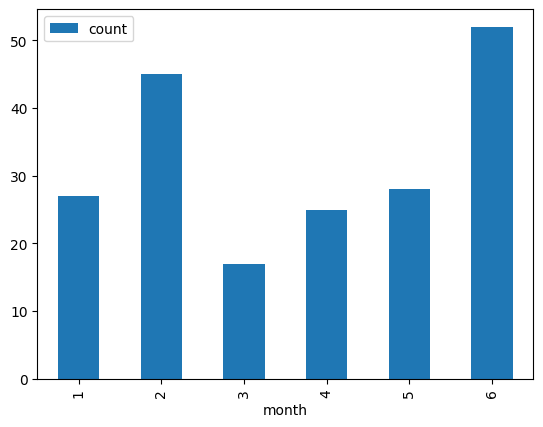

In [30]:
# 1. How many annotations you have per month and year. Which month has more annotation files.

# Get into the correct format the datetimes of the txt files.

annotations = glob.glob('../Session 4/session_4/annotations/*.txt')

date_times = []

for annotation in glob.glob('../Session 4/session_4/annotations/*.txt'):

    match = re.match(r'(\d{8})_(\d{6})_SN(\d+)_QUICKVIEW_VISUAL_([\d_]+)_([A-Za-z0-9\-_.]+)\.txt' , os.path.basename(annotation))
    if match:
        date, time, _, _, _ = match.groups()

        date_times.append(datetime.strptime(date + time, "%Y%m%d%H%M%S"))

# Create a dataframe with these datetimes.

x = pd.DataFrame({
    'year': [i.year for i in date_times],
    'month': [i.month for i in date_times],
    'day': [i.day for i in date_times],
})

# Group by month and year.

x_counts = x.groupby(['year', 'month']).agg(count=('day', 'count')).reset_index()

# Plot this to  visually answer the question.

x_counts.plot(x='month', y='count', kind='bar');

# Find, more specifically, the correct answer to the question.

max_annotations = x_counts[x_counts['count'] == x_counts['count'].max()]
month_name = datetime(1900, max_annotations['month'].item(), 1).strftime('%B')

print(f'The month with the most annotations is {month_name}, {max_annotations['year'].item()}.')

In [34]:
# 2. Create a dictionary where each **key** is a month, and the corresponding **value** is a list containing all the annotation names with where their date corresponds to the month. 
#     a. Save it following the json format, and load it again to check that everything is ok.
#     b. Save it this time using Pickle.
#     c. Instead of storing a list of all the annotation names happening that month, let's create for each annotation a dictionary with keys: name and date (using a datetime object).

month_annotations = {}

for annotation in glob.glob('../Session 4/session_4/annotations/*.txt'):
    match = re.match(r'(\d{8})_(\d{6})_SN(\d+)_QUICKVIEW_VISUAL_([\d_]+)_([A-Za-z0-9\-_.]+)\.txt' , os.path.basename(annotation))
    if match:
        date, time, _, _, filename = match.groups()
        date_time = datetime.strptime(date + time, "%Y%m%d%H%M%S")
        month_key = date_time.month

        if month_key not in month_annotations:
            month_annotations[month_key] = []

        month_annotations[month_key].append(filename)

with open('month_annotations.json', 'w') as json_file:
    json.dump(month_annotations, json_file)

with open('month_annotations.json', 'r') as json_file:
    loaded_annotations = json.load(json_file)

print("Loaded annotations from JSON format:", loaded_annotations)

with open('month_annotations.pkl', 'wb') as pickle_file:
    pickle.dump(month_annotations, pickle_file)

with open('month_annotations.pkl', 'rb') as pickle_file:
    loaded_annotations_pickle = pickle.load(pickle_file)

print("Loaded annotations from Pickle:", loaded_annotations_pickle)

month_annotations_with_dates = {}

for annotation in glob.glob('../Session 4/session_4/annotations/*.txt'):
    match = re.match(r'(\d{8})_(\d{6})_SN(\d+)_QUICKVIEW_VISUAL_([\d_]+)_([A-Za-z0-9\-_.]+)\.txt' , os.path.basename(annotation))
    if match:
        date, time, _, _, filename = match.groups()
        date_time = datetime.strptime(date + time, "%Y%m%d%H%M%S")

        month_key = date_time.month
        
        annotation_data = {'name': filename, 'date': date_time}

        if month_key not in month_annotations_with_dates:
            month_annotations_with_dates[month_key] = []

        month_annotations_with_dates[month_key].append(annotation_data)

print("Annotations with name and date:", month_annotations_with_dates)

Loaded annotations from JSON format: {'1': ['SATL-2KM-11N_404_3770', 'SATL-2KM-11N_404_3772', 'SATL-2KM-10N_552_4162', 'SATL-2KM-10N_552_4164', 'SATL-2KM-10N_554_4162', 'SATL-2KM-11N_392_3740', 'SATL-2KM-11N_392_3742', 'SATL-2KM-11N_396_3752', 'SATL-2KM-11N_740_3850', 'SATL-2KM-11N_690_3572', 'SATL-2KM-11N_414_3786', 'SATL-2KM-10N_556_4178', 'SATL-2KM-11N_380_3728', 'SATL-2KM-11N_386_3750', 'SATL-2KM-11N_376_3722', 'SATL-2KM-11N_380_3724', 'SATL-2KM-11N_386_3722', 'SATL-2KM-11N_500_3600', 'SATL-2KM-11N_500_3602', 'SATL-2KM-11N_502_3600', 'SATL-2KM-11N_502_3602', 'SATL-2KM-11N_418_3862', 'SATL-2KM-11N_418_3864', 'SATL-2KM-11N_360_3748', 'SATL-2KM-11N_364_3754', 'SATL-2KM-11N_366_3756', 'SATL-2KM-11N_366_3756'], '2': ['SATL-2KM-39N_556_2792', 'SATL-2KM-39N_556_2794', 'SATL-2KM-39N_558_2794', 'SATL-2KM-39N_560_2792', 'SATL-2KM-39N_560_2794', 'SATL-2KM-39N_560_2796', 'SATL-2KM-39N_562_2792', 'SATL-2KM-39N_562_2794', 'SATL-2KM-39N_556_2792', 'SATL-2KM-39N_562_2788', 'SATL-2KM-11N_624_3630',

In [ ]:
second_half_2024 = []

for annotation in glob.glob('../Session 4/session_4/annotations/*.txt'):
    match = re.match(r'(\d{8})_(\d{6})_SN(\d+)_QUICKVIEW_VISUAL_([\d_]+)_([A-Za-z0-9\-_.]+)\.txt' , os.path.basename(annotation))
    if match:
        date, time, _, _, filename = match.groups()
        date_time = datetime.strptime(date + time, "%Y%m%d%H%M%S")

        if date_time.year == 2024 and date_time.month >= 7:
            second_half_2024.append((date_time, filename))

second_half_2024_sorted = sorted(second_half_2024, key=lambda x: x[0])

for date_time, filename in second_half_2024_sorted:
    print(f"{date_time}: {filename}")